# Models

Firstly, we need to import the libraries we will use.

In [399]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Secondly, we need to load the data.

In [400]:
train = pd.read_csv('train_engineered.csv')
test = pd.read_csv('test_engineered.csv')

In [401]:
# print the title of each column of the train dataset
print(train.columns.values)

['Unnamed: 0' 'id' 'belongs_to_collection' 'original_budget'
 'budget_processed' 'genre_rank' 'num_genres' 'has_homepage'
 'originally_english' 'topStudio' 'numTopStudios' 'num_studios'
 'studioRank' 'num_production_countries' 'topCountry' 'countryRank'
 'usa_produced' '1960s' '1970s' '1980s' '1990s' '2000s' '2010s'
 'mondayRelease' 'tuesdayRelease' 'wednesdayRelease' 'thursdayRelease'
 'fridayRelease' 'saturdayRelease' 'sundayRelease' 'Winter' 'Fall'
 'Spring' 'Summer' 'runtime_processed' 'spoken_english' 'num_languages'
 'has_tagline' 'num_keywords' 'numTopKeywords' 'keywordRank' 'cast_num'
 'topLeadActor' 'numTopActors' 'actorRanks' 'topActorRank' 'crew_num'
 'topLeadDirector' 'numTopDirectors' 'directorsRank' 'topLeadExecProd'
 'numTopExecProd' 'execProdRank' 'topLeadProducer' 'numTopProducers'
 'producersRank' 'topLeadComposer' 'numTopComposers' 'composersRank'
 'topLeadDirectorPhoto' 'numTopDirectorsPhoto' 'directorsPhotoRank'
 'topLeadEditor' 'numTopEditors' 'editorsRank' 'budge

In [402]:
# print the title of each column of the test dataset
print(test.columns.values)

['Unnamed: 0' 'id' 'belongs_to_collection' 'original_budget'
 'budget_processed' 'genre_rank' 'num_genres' 'has_homepage'
 'originally_english' 'topStudio' 'numTopStudios' 'num_studios'
 'studioRank' 'num_production_countries' 'topCountry' 'countryRank'
 'usa_produced' '1960s' '1970s' '1980s' '1990s' '2000s' '2010s'
 'mondayRelease' 'tuesdayRelease' 'wednesdayRelease' 'thursdayRelease'
 'fridayRelease' 'saturdayRelease' 'sundayRelease' 'Winter' 'Fall'
 'Spring' 'Summer' 'runtime_processed' 'spoken_english' 'num_languages'
 'has_tagline' 'num_keywords' 'numTopKeywords' 'keywordRank' 'cast_num'
 'topLeadActor' 'numTopActors' 'actorRanks' 'topActorRank' 'crew_num'
 'topLeadDirector' 'numTopDirectors' 'directorsRank' 'topLeadExecProd'
 'numTopExecProd' 'execProdRank' 'topLeadProducer' 'numTopProducers'
 'producersRank' 'topLeadComposer' 'numTopComposers' 'composersRank'
 'topLeadDirectorPhoto' 'numTopDirectorsPhoto' 'directorsPhotoRank'
 'topLeadEditor' 'numTopEditors' 'editorsRank' 'budge

In [403]:
train['log_budget']=np.log1p(train['original_budget'])
test['log_budget']=np.log1p(test['original_budget'])

## Error Detection Models
Error Detection Models are used to detect errors in the dataset. It is a classier that classifies the data into two classes: error and non-error. We will use lightgbm as our error detection model.

### 1. data preparation

Firstly, we need to prepare the data for the error detection model. We will use the data from the previous notebook. By plotting the distribution of the data, we can see seperation between the error and non-error data by recognizing the outliers and abnormal data.

C:\Users\zjy\AppData\Local\Temp\ipykernel_22428\4229348723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['revenue'], kde=False)


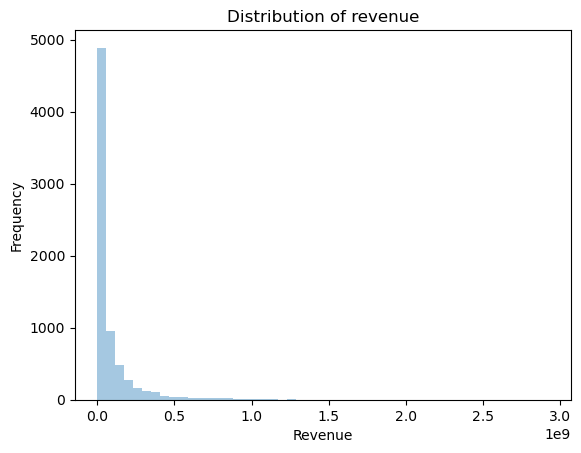

In [404]:
#plot the distribution of the revenue in the training set
sns.distplot(train['revenue'], kde=False)
plt.title('Distribution of revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_22428\1025018483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['original_budget'], kde=False)


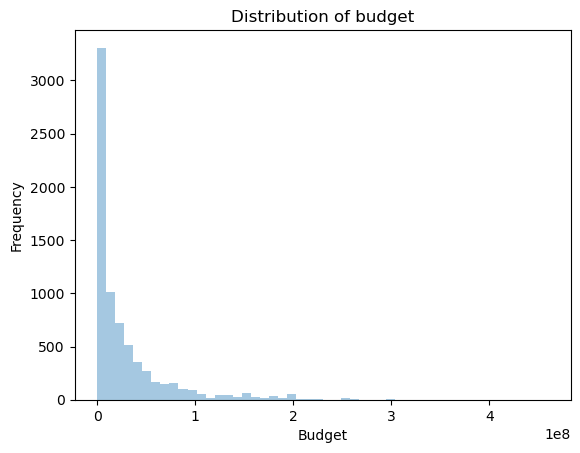

In [405]:
#plot the distribution of the budget in the training set
sns.distplot(train['original_budget'], kde=False)
plt.title('Distribution of budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_22428\668996526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['log_revenue'], kde=False)


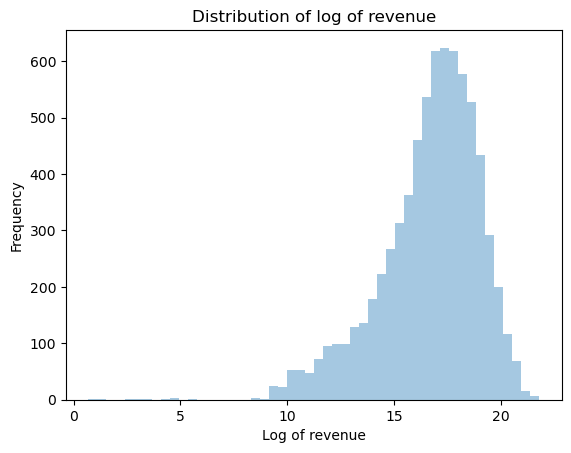

In [406]:
# plot the distribution of the log of the revenue in the training set
sns.distplot(train['log_revenue'], kde=False)
plt.title('Distribution of log of revenue')
plt.xlabel('Log of revenue')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_22428\3171513416.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['log_budget'], kde=False)


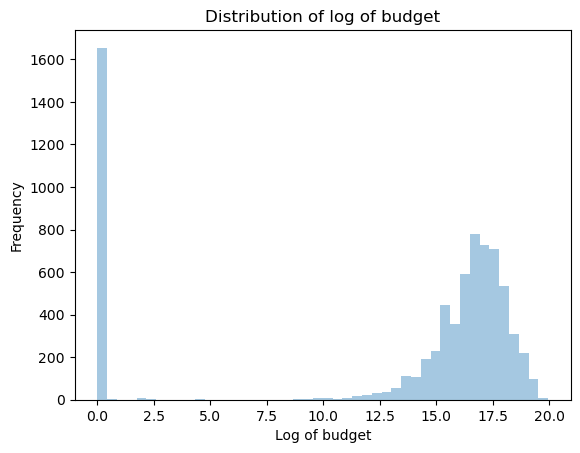

In [407]:
# plot the distribution of the log of the budget in the training set
sns.distplot(train['log_budget'], kde=False)
plt.title('Distribution of log of budget')
plt.xlabel('Log of budget')
plt.ylabel('Frequency')
plt.show()

By seeing the graph above, we will divide the data into two parts: error and non-error and label them as 1 and 0 respectively. We will use these labels to train the error detection model.

In [408]:
#store all the data that is zero in budget or revenue in a new dataframe called error
#store all the data that is not zero in budget or revenue in a new dataframe called non_error_train
error_train = train[(train['revenue'] == 0) | (train['original_budget'] == 0)]
non_error_train = train[(train['original_budget'] != 0) & (train['revenue'] != 0)]
#move all the data whose log_budegt is less than 10 in non-error to the error dataframe
temp = non_error_train[non_error_train['log_budget'] < 10]
error_train = error_train._append(temp, ignore_index=True)
non_error_train = non_error_train[non_error_train['log_budget'] >= 10]
#move all the data whose log_revenue is less than 7.5 in non-error to the error dataframe
temp = non_error_train[non_error_train['log_revenue'] < 7.5]
error_train = error_train._append(temp, ignore_index=True)
non_error_train = non_error_train[non_error_train['log_revenue'] >= 7.5]

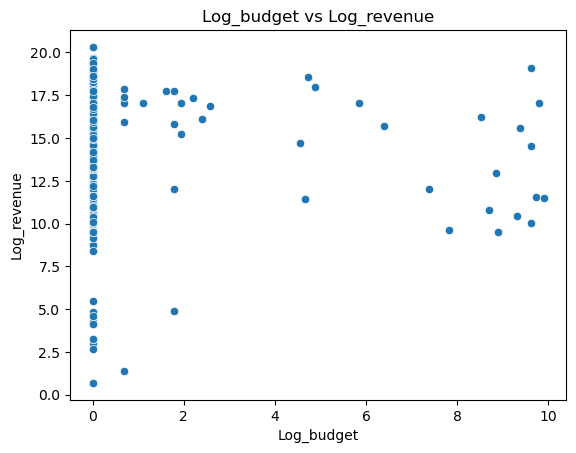

In [409]:
#plot the distribution of the log_budegt against the log_revenue in the error set
sns.scatterplot(x='log_budget', y='log_revenue', data=error_train)
plt.title('Log_budget vs Log_revenue')
plt.xlabel('Log_budget')
plt.ylabel('Log_revenue')
plt.show()

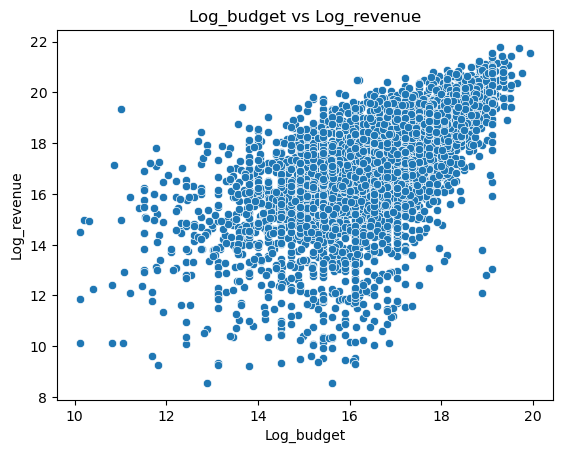

In [410]:
#plot the distribution of the log_budegt against the log_revenue in the non-error set
sns.scatterplot(x='log_budget', y='log_revenue', data=non_error_train)
plt.title('Log_budget vs Log_revenue')
plt.xlabel('Log_budget')
plt.ylabel('Log_revenue')
plt.show()

In [411]:
#label the error set as 1 and the non-error set as 0
error_train['error'] = 1
non_error_train['error'] = 0
#combine the error and non-error set
train_labeled = error_train._append(non_error_train, ignore_index=True)

In [412]:
# split the training set into training and validation set, with a evenly distributed error and non-error set
train_labeled, val_labeled = train_test_split(train_labeled, test_size=0.2, random_state=42, stratify=train_labeled['error'])

### 2. training

In [413]:
# feature_classification selection
feature_classification = ['runtime_to_year_ratio','inflationBudget','popularity','popularity_year_ratio','num_keywords']
target = 'error'

# split the feature_classification and target in the training set
X_train = train_labeled[feature_classification]
y_train = train_labeled[target]
# split the feature_classification and target in the validation set
X_val = val_labeled[feature_classification]
y_val = val_labeled[target]

# create a lgb dataset for training
train_data = lgb.Dataset(X_train, label=y_train)
# create a lgb dataset for validation
val_data = lgb.Dataset(X_val, label=y_val)

# set the parameters for the lgb model
param = {'num_leaves': 30,
          'objective': 'binary',
          'metric': 'auc',
          'max_depth': 5,
          'learning_rate': 0.1,
          'feature_fraction': 0.9,
          'min_data_in_leaf': 5,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 1,
          'lambda_l2': 1,
          'verbose': -1}
# train the lgb model
lgb_error_detection = lgb.train(param, train_data, valid_sets=[val_data])

# predict the validation set
y_pred = lgb_error_detection.predict(X_val, num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

# calculate the accuracy, precision, recall and f1 score
accuracy = sum(y_pred == y_val) / len(y_val)
print(accuracy)
precision = sum((y_pred == 1) & (y_val == 1)) / sum(y_pred == 1)
print(precision)
recall = sum((y_pred == 1) & (y_val == 1)) / sum(y_val == 1)
print(recall)
f1 = 2 * precision * recall / (precision + recall)
print(f1)

0.9945130315500685
0.9910714285714286
0.985207100591716
0.9881305637982196


### 3. save the model

In [414]:
# save the model
lgb_error_detection.save_model('model/lgb_error_detection.pkl')

### 4. prediction

In [415]:
# predict the test set
y_pred = lgb_error_detection.predict(test[feature_classification], num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
test['error'] = y_pred

In [416]:
# predict the error set using the error detection model
y_pred = lgb_error_detection.predict(error_train[feature_classification], num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
error_train['error'] = y_pred

# split the test set into error and non-error set
error_test = test[test['error'] == 1]
non_error_test = test[test['error'] == 0]

In [417]:
print(error_test.shape)
print(non_error_test.shape)

(1276, 72)
(3122, 72)


## Models for revenue prediction

### 1. Model for error-free data

we will use 3 models: lightgbm, xgboost, and catboost. Then we will use the average of the predictions of these models as our final prediction.

Use Five-Fold Cross Validation to Evaluate the Model

In [418]:
# split the training set into training and validation set, use Five-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# feature selection
feature_regression = ['numTopStudios','popularity_year_ratio','budget_processed','runtime_processed']
target = 'revenue'

In [419]:
# lightgbm
# set the parameters for the lgb model
param = {'num_leaves': 10,
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth': 5,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'min_data_in_leaf': 10,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 0.2,
          'lambda_l2': 1,
          'verbose': -1}
# train the lgb model
lgb_model_non_error = []
lgb_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    lgb_model = lgb.train(param, train_data, valid_sets=[val_data])
    lgb_model_non_error.append(lgb_model)
    # evaluate the model
    y_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
    lgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)



131836274.03866398
127878949.57229885
117890108.25937572
117320394.58863162


103601895.28524907


In [420]:
# xgboost
# set the parameters for the xgb model
param = {'objective': 'reg:squarederror', 
              'eta': 0.01, 
              'max_depth': 8, 
              'subsample': 0.6, 
              'colsample_bytree': 0.7,  
              'eval_metric': 'rmse', 
}
# train the xgb model
xgb_model_non_error = []
xgb_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)
    xgb_model = xgb.train(param, train_data, evals=[(val_data, 'validation')])
    xgb_model_non_error.append(xgb_model)
    # evaluate the model
    y_pred = xgb_model.predict(val_data)
    xgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


[0]	validation-rmse:232039638.42957
[1]	validation-rmse:230766957.93966
[2]	validation-rmse:229507727.48608
[3]	validation-rmse:228332152.76879
[4]	validation-rmse:227554292.29138
[5]	validation-rmse:226712579.05984
[6]	validation-rmse:225343194.16742
[7]	validation-rmse:224048897.17197
[8]	validation-rmse:223109079.11408
[9]	validation-rmse:222019142.28334


222019140.6945065
[0]	validation-rmse:250995894.14214
[1]	validation-rmse:249530407.87262
[2]	validation-rmse:248122911.03434
[3]	validation-rmse:246874200.90399
[4]	validation-rmse:245870189.23470
[5]	validation-rmse:245078401.09061
[6]	validation-rmse:243516364.83428
[7]	validation-rmse:242165871.65441
[8]	validation-rmse:240977106.18940
[9]	validation-rmse:239660593.74734
239660594.09859422
[0]	validation-rmse:211037788.71516
[1]	validation-rmse:209923528.39235
[2]	validation-rmse:208692602.94163
[3]	validation-rmse:207486552.22338
[4]	validation-rmse:206472203.61303
[5]	validation-rmse:205489343.44811
[6]	validation-rmse:204208737.97235
[7]	validation-rmse:202960104.75355
[8]	validation-rmse:202016033.79008
[9]	validation-rmse:200827936.94864
200827937.81156522
[0]	validation-rmse:200690270.98395
[1]	validation-rmse:199452727.72487
[2]	validation-rmse:198147284.61012
[3]	validation-rmse:197466614.08775
[4]	validation-rmse:196153480.42747
[5]	validation-rmse:194827325.01672
[6]	vali

d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

In [421]:
# catboost
# set the parameters for the cat model
param = {'iterations' : 5000,
        'learning_rate':0.004,
        'depth':5,
        'eval_metric':'RMSE',
        'colsample_bylevel':0.8,
        'bagging_temperature' : 0.2,
        'metric_period' : None,
        'early_stopping_rounds':200
}
# train the cat model
cat_model_non_error = []
cat_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = cat.Pool(X_train, label=y_train)
    val_data = cat.Pool(X_val, label=y_val)
    cat_model = cat.CatBoostRegressor(**param)
    cat_model.fit(train_data, eval_set=val_data)
    cat_model_non_error.append(cat_model)
    # evaluate the model
    y_pred = cat_model.predict(val_data)
    cat_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)

0:	learn: 192718409.9299974	test: 204358828.0068424	best: 204358828.0068424 (0)	total: 1.65ms	remaining: 8.27s
1:	learn: 192330254.1285288	test: 203996983.5703236	best: 203996983.5703236 (1)	total: 3.23ms	remaining: 8.08s
2:	learn: 191938963.1529999	test: 203633802.3536451	best: 203633802.3536451 (2)	total: 4.88ms	remaining: 8.13s
3:	learn: 191544064.7318232	test: 203281106.1083294	best: 203281106.1083294 (3)	total: 6.48ms	remaining: 8.1s
4:	learn: 191147190.6830800	test: 202907397.8776986	best: 202907397.8776986 (4)	total: 7.91ms	remaining: 7.9s
5:	learn: 190754993.5298512	test: 202553377.6720067	best: 202553377.6720067 (5)	total: 9.27ms	remaining: 7.72s
6:	learn: 190367732.8008817	test: 202180109.4984147	best: 202180109.4984147 (6)	total: 10.7ms	remaining: 7.65s
7:	learn: 189953161.6695400	test: 201788840.1499970	best: 201788840.1499970 (7)	total: 12.5ms	remaining: 7.79s
8:	learn: 189554399.3855924	test: 201410428.6131670	best: 201410428.6131670 (8)	total: 13.8ms	remaining: 7.67s
9:	

In [422]:
# train a linear regression model to adjust the prediction of the three models

# split the non-error training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(non_error_train[feature_regression], non_error_train[target], test_size=0.2, random_state=42)

def prediction(model, data):
    pred = []
    for i in range(len(model)):
        pred.append(model[i].predict(data))
    pred = np.array(pred)
    pred = np.mean(pred, axis=0)
    return pred

# predict the training set using the three models
lgb_train = prediction(lgb_model_non_error, X_train)
xgb_train = prediction(xgb_model_non_error, xgb.DMatrix(X_train))
cat_train = prediction(cat_model_non_error, cat.Pool(X_train))

# train a linear regression model to adjust the prediction of the three models
lr_non_error = LinearRegression()
lr_non_error.fit(np.array([lgb_train, xgb_train, cat_train]).T, y_train)
print(lr_non_error.coef_)

# predict the validation set using the three models
lgb_val = prediction(lgb_model_non_error, X_val)
xgb_val = prediction(xgb_model_non_error, xgb.DMatrix(X_val))
cat_val = prediction(cat_model_non_error, cat.Pool(X_val))

# predict the validation set using the linear regression model
y_pred = lr_non_error.predict(np.array([lgb_val, xgb_val, cat_val]).T)

# calculate the loss
loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
print(loss)




[ 1.33914507  8.89301885 -0.93195862]
107965117.0222239


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

### 2. Model for error data

In [423]:
# lightgbm
# set the parameters for the lgb model
param = {'num_leaves': 10,
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth': 5,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'min_data_in_leaf': 10,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 0.2,
          'lambda_l2': 1,
          'verbose': -1}

# train the lgb model
lgb_model_error = []
lgb_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    lgb_model = lgb.train(param, train_data, valid_sets=[val_data])
    lgb_model_error.append(lgb_model)
    # evaluate the model
    y_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
    lgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


22656387.196014225
36055516.16521799
26802013.776625212
37848773.369016774
29626406.366986286


In [424]:
# xgboost
# set the parameters for the xgb model
param = {'objective': 'reg:squarederror', 
              'eta': 0.01, 
              'max_depth': 8, 
              'subsample': 0.6, 
              'colsample_bytree': 0.7,  
              'eval_metric': 'rmse', 
}
# train the xgb model
xgb_model_error = []
xgb_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)
    xgb_model = xgb.train(param, train_data, evals=[(val_data, 'validation')])
    xgb_model_error.append(xgb_model)
    # evaluate the model
    y_pred = xgb_model.predict(val_data)
    xgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


[0]	validation-rmse:29855117.59227
[1]	validation-rmse:29760206.29820
[2]	validation-rmse:29600717.46979
[3]	validation-rmse:29530641.98892
[4]	validation-rmse:29452624.12783
[5]	validation-rmse:29272901.36883
[6]	validation-rmse:29207713.77650
[7]	validation-rmse:29141143.58388
[8]	validation-rmse:29066665.06403
[9]	validation-rmse:28895903.10187
28895903.269621678
[0]	validation-rmse:44739578.93056
[1]	validation-rmse:44690340.80074
[2]	validation-rmse:44561157.66149
[3]	validation-rmse:44508673.87648
[4]	validation-rmse:44454971.15772
[5]	validation-rmse:44403872.13899


[6]	validation-rmse:44353935.14703
[7]	validation-rmse:44223306.17186
[8]	validation-rmse:44177917.17463
[9]	validation-rmse:44089418.97203
44089419.000090994
[0]	validation-rmse:34111044.02346
[1]	validation-rmse:34050226.39744
[2]	validation-rmse:33956199.58456
[3]	validation-rmse:33883774.63607
[4]	validation-rmse:33786308.87433
[5]	validation-rmse:33715910.80836
[6]	validation-rmse:33647645.94495
[7]	validation-rmse:33560008.02413
[8]	validation-rmse:33498306.56814
[9]	validation-rmse:33403254.10111
33403254.21295239
[0]	validation-rmse:47371663.61803
[1]	validation-rmse:47321049.32442
[2]	validation-rmse:47219224.36006
[3]	validation-rmse:47174397.27366
[4]	validation-rmse:47123569.58108
[5]	validation-rmse:47089024.09264
[6]	validation-rmse:47039818.63915
[7]	validation-rmse:46972677.34364
[8]	validation-rmse:46933096.97489
[9]	validation-rmse:46876214.50879
46876214.21336785
[0]	validation-rmse:34359024.51824
[1]	validation-rmse:34283522.68050
[2]	validation-rmse:34143014.49705


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

In [425]:
# catboost
# set the parameters for the cat model
param = {'iterations' : 5000,
        'learning_rate':0.004,
        'depth':5,
        'eval_metric':'RMSE',
        'colsample_bylevel':0.8,
        'bagging_temperature' : 0.2,
        'metric_period' : None,
        'early_stopping_rounds':200
}
# train the cat model
cat_model_error = []
cat_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = cat.Pool(X_train, label=y_train)
    val_data = cat.Pool(X_val, label=y_val)
    cat_model = cat.CatBoostRegressor(**param)
    cat_model.fit(train_data, eval_set=val_data)
    cat_model_error.append(cat_model)
    # evaluate the model
    y_pred = cat_model.predict(val_data)
    cat_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)
    

0:	learn: 37290108.5701105	test: 26206871.1849622	best: 26206871.1849622 (0)	total: 1.13ms	remaining: 5.66s
1:	learn: 37256328.2748387	test: 26179231.9562401	best: 26179231.9562401 (1)	total: 2.14ms	remaining: 5.35s
2:	learn: 37225886.7285542	test: 26152066.8099922	best: 26152066.8099922 (2)	total: 3.19ms	remaining: 5.31s
3:	learn: 37184011.6747416	test: 26119467.4257873	best: 26119467.4257873 (3)	total: 4.14ms	remaining: 5.17s
4:	learn: 37148770.6951011	test: 26097512.1023952	best: 26097512.1023952 (4)	total: 5.17ms	remaining: 5.17s
5:	learn: 37115067.8309775	test: 26069127.5897590	best: 26069127.5897590 (5)	total: 6.09ms	remaining: 5.07s
6:	learn: 37071966.8499355	test: 26040430.8865665	best: 26040430.8865665 (6)	total: 7.05ms	remaining: 5.03s
7:	learn: 37036042.7623712	test: 26018170.0501406	best: 26018170.0501406 (7)	total: 7.93ms	remaining: 4.95s
8:	learn: 36999215.7936970	test: 25992637.4988360	best: 25992637.4988360 (8)	total: 8.99ms	remaining: 4.98s
9:	learn: 36958279.1819503	t

In [426]:
# train a linear regression model to adjust the prediction of the three models

# split the error training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(error_train[feature_regression], error_train[target], test_size=0.2, random_state=42)

def prediction(model, data):
    pred = []
    for i in range(len(model)):
        pred.append(model[i].predict(data))
    pred = np.array(pred)
    pred = np.mean(pred, axis=0)
    return pred

# predict the training set using the three models
lgb_train = prediction(lgb_model_error, X_train)
xgb_train = prediction(xgb_model_error, xgb.DMatrix(X_train))
cat_train = prediction(cat_model_error, cat.Pool(X_train))

# train a linear regression model to adjust the prediction of the three models
lr_error = LinearRegression()
lr_error.fit(np.array([lgb_train, xgb_train, cat_train]).T, y_train)
print(lr_error.coef_)

# predict the validation set using the three models
lgb_val = prediction(lgb_model_error, X_val)
xgb_val = prediction(xgb_model_error, xgb.DMatrix(X_val))
cat_val = prediction(cat_model_error, cat.Pool(X_val))

# predict the validation set using the linear regression model
y_pred = lr_error.predict(np.array([lgb_val, xgb_val, cat_val]).T)

# calculate the loss
loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
print(loss)

[-0.04135306 21.63229651  0.58398809]
18340947.00554971


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

## Prediction

### 1. Prediction for error-free data

In [433]:
# predict the non-error set using the three models
lgb_non_error = prediction(lgb_model_non_error, non_error_test[feature_regression])
xgb_non_error = prediction(xgb_model_non_error, xgb.DMatrix(non_error_test[feature_regression]))
cat_non_error = prediction(cat_model_non_error, cat.Pool(non_error_test[feature_regression]))

# predict the non-error set using the linear regression model
y_pred = lr_non_error.predict(np.array([lgb_non_error, xgb_non_error, cat_non_error]).T)
# if the prediction is negative, set it to zero
non_error_test['revenue'] = y_pred

# predict the error set using the three models
lgb_error = prediction(lgb_model_error, error_test[feature_regression])
xgb_error = prediction(xgb_model_error, xgb.DMatrix(error_test[feature_regression]))
cat_error = prediction(cat_model_error, cat.Pool(error_test[feature_regression]))

# predict the error set using the linear regression model
y_pred = lr_error.predict(np.array([lgb_error, xgb_error, cat_error]).T)
error_test['revenue'] = y_pred


0
0
0
0
0
0


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

In [431]:
# combine the error and non-error set
test = error_test._append(non_error_test, ignore_index=True)

In [432]:
df_sub = pd.DataFrame()
sub= ['id','revenue']
df_sub[sub]=test[sub]
df_sub.to_csv("submission1.csv", index=False)